In [7]:
import pandas as pd
import numpy.linalg as la
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [8]:
pca = pd.read_csv('CelsoEdit.csv', encoding='latin1', sep=';')
pca[0:3]

FileNotFoundError: File b'CelsoEdit.csv' does not exist

In [9]:
# convert matrix to float
pca = pca.astype('float64')

# drops the empty line at file-end
pca.dropna(how="all", inplace=True)

pca.tail()

NameError: name 'pca' is not defined

In [6]:
# split data table into data X and class labels y

X = pca.iloc[:,0:5].values
y = pca.iloc[:,5].values

NameError: name 'pca' is not defined

In [7]:
# covariance matrix
cov_pca = np.cov(np.transpose(pca))

print('Covariance matrix \n%s' %cov_pca)

NameError: name 'pca' is not defined

In [306]:
# eigenvectors and eigenvalues 

eig_vals, eig_vecs = la.eig(cov_pca)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.00000000e+00 -3.04891734e-07 -9.41809177e-09  3.79838554e-09
   1.78795617e-10 -2.21244391e-12  0.00000000e+00]
 [ 3.57668694e-10 -5.55837467e-04 -3.37372956e-04  1.65653307e-03
   9.99103321e-01 -4.23011409e-02  0.00000000e+00]
 [-1.34182538e-11  2.49605137e-05  1.65552210e-05 -7.87968355e-05
  -4.23010578e-02 -9.99104906e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.04882044e-07 -9.99999304e-01  1.03580795e-03  9.92310006e-05
  -5.56210991e-04 -1.42412885e-06  0.00000000e+00]
 [-9.68904788e-09  1.03672040e-03  9.99931015e-01  1.16956652e-02
   3.18929414e-04  2.16926471e-06  0.00000000e+00]
 [-3.88112892e-09 -8.80346697e-05  1.16952170e-02 -9.99930223e-01
   1.66217176e-03  8.67890148e-06  0.00000000e+00]]

Eigenvalues 
[8.37706999e+16 1.82431665e+08 1.08732243e+05 3.00673893e+04
 5.28685457e+01 1.91973060e-03 0.00000000e+00]


In [307]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.377069986697008e+16
182431665.3915822
108732.24338420377
30067.389267407085
52.86854570172403
0.0019197305999828858
0.0


In [308]:
# principal components
matrix_w = np.hstack((eig_pairs[2][1].reshape(7,1), 
                      eig_pairs[3][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-9.41809177e-09  3.79838554e-09]
 [-3.37372956e-04  1.65653307e-03]
 [ 1.65552210e-05 -7.87968355e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.03580795e-03  9.92310006e-05]
 [ 9.99931015e-01  1.16956652e-02]
 [ 1.16952170e-02 -9.99930223e-01]]


In [309]:
Y = pca.dot(matrix_w)

In [310]:
Y[0:10]

,0,1
0,466.629261,-102.950773
1,331.252632,-71.531990
2,219.398360,-78.288087
3,175.436481,-81.802487
4,143.380212,-77.177097
5,89.021386,-46.810826
6,59.964910,-42.150350
7,57.302226,-42.486658
8,52.431218,-53.544369
9,62.331129,-130.433735


NameError: name 'Y' is not defined

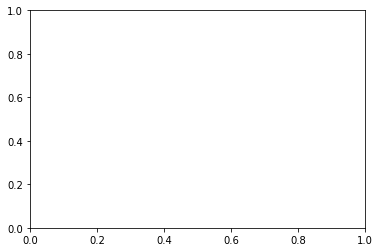

In [2]:
# Fixing random state for reproducibility
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(Y, 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()